# AAI-590-01_CAPSTONE

# Exploratory Data Analysis (EDA) Overview

Exploratory Data Analysis (EDA) plays a crucial role in understanding the underlying patterns, anomalies, relationships, and trends within a dataset.

One of the initial steps in EDA, especially for a classification problem like the Home Credit Default Risk, is to examine the distribution of the target variable. In this case, the TARGET column indicates whether a loan was repaid (0) or not (1)

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset


In [2]:
data1=pd.read_csv('application_train.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
app_train = data1.copy()


In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_train.shape

(307511, 122)

In [6]:
# using .tolist makes Python print all columns, instead of using ellipsis
# We could also configure pandas to do the same.
print(app_train.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [7]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [8]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

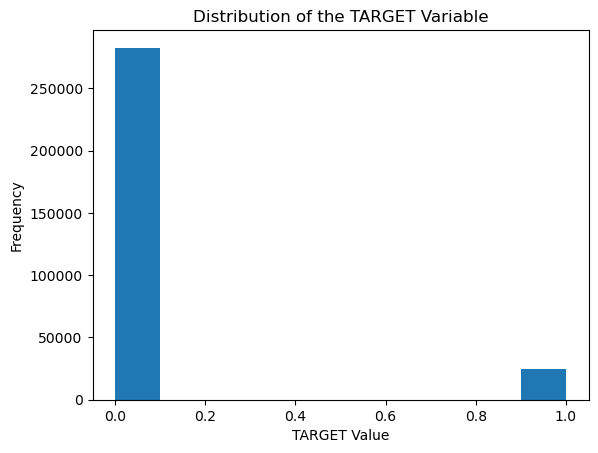

In [9]:
# Visualizing the distribution of the 'TARGET' column
app_train['TARGET'].astype(int).plot.hist()
plt.title('Distribution of the TARGET Variable')
plt.xlabel('TARGET Value')
plt.ylabel('Frequency')
plt.show()

From above, we note that there are 282,686 instances where the loan was repaid (TARGET=0) and 24,825 instances where the loan was not repaid (TARGET=1). This indicates a significant imbalance in the dataset: 91.93% of the loans were repaid on time, while only 8.07% were not. Such an imbalance can influence the performance of machine learning models, as they might become biased towards predicting the majority class.

CREATE DATEFRAME FOR PLOTS AFTER DECIDING ON VARIABLES

In [10]:
data=app_train

MISSING VALUE CHECK

In [11]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100*df.isnull().sum() / len(df)
    
    mis_val_table =pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending = False).round(1)
    
    print('Your selected dataframe has' + str(df.shape[1])+ 'columns.\n'
         "There are" + str(mis_val_table_ren_columns.shape[0])+ 'columns that have missing values.')
    
    return mis_val_table_ren_columns

In [12]:
# missing values check
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has122columns.
There are67columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

In [13]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [14]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis =0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Encoding Categorical Variables

In [15]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
        # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
           
        
            le_count +=1
        
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [16]:
app_train = pd.get_dummies(app_train)


print('Training Feature shape: ', app_train.shape)



Training Feature shape:  (307511, 243)


In [17]:
train_labels =app_train['TARGET']



app_train['TARGET'] =train_labels

print('Training Feature shape: ', app_train.shape)


Training Feature shape:  (307511, 243)


In [18]:
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(50))
print('\nMost Negative Correlations:\n', correlations.head(50))

Most Positive Correlations:
 OCCUPATION_TYPE_Cleaning staff                       0.006979
ORGANIZATION_TYPE_Security                           0.007226
OCCUPATION_TYPE_Waiters/barmen staff                 0.007802
ORGANIZATION_TYPE_Agriculture                        0.007901
WALLSMATERIAL_MODE_Wooden                            0.007946
ORGANIZATION_TYPE_Trade: type 7                      0.008170
NAME_TYPE_SUITE_Unaccompanied                        0.008301
NAME_INCOME_TYPE_Unemployed                          0.008784
ORGANIZATION_TYPE_Trade: type 3                      0.008911
OBS_60_CNT_SOCIAL_CIRCLE                             0.009022
OBS_30_CNT_SOCIAL_CIRCLE                             0.009131
CNT_FAM_MEMBERS                                      0.009308
ORGANIZATION_TYPE_Industry: type 3                   0.009691
ORGANIZATION_TYPE_Restaurant                         0.010266
NAME_EDUCATION_TYPE_Lower secondary                  0.011747
OCCUPATION_TYPE_Cooking staff            

From reviewing the correlations above we selected the independent variables below

Selected Columns

1. SK_ID_CURR---ID of loan in our sample

2. TARGET---Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of      the first Y installments of the loan in our sample, 0 - all other cases)

3. FLAG_OWN_CAR---Flag if the client owns a car.

4. FLAG_OWN_REALTY---Flag if client owns a house or flat.

5. AMT_INCOME_TOTAL---Income of the client.

6. AMT_CREDIT---Credit amount of the loan.

7. NAME_EDUCATION_TYPE---Level of highest education the client achieved.

8. DAYS_BIRTH---Client's age in days at the time of application.

9. DAYS_EMPLOYED---How many days before the application the person started current employment.

10.EXT_SOURCE_1---Normalized score from external data source

11.EXT_SOURCE_2---Normalized score from external data source

12.EXT_SOURCE_3---Normalized score from external data source

13.NAME_INCOME_TYPE---Clients income type (businessman, working, maternity leave,…)

14.CODE_GENDER---Gender of the client

15.OWN_CAR_AGE---Age of client's car

In [19]:
loan=app_train[['SK_ID_CURR','TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_EDUCATION_TYPE_Secondary / secondary special','DAYS_BIRTH','DAYS_EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_INCOME_TYPE_Working','CODE_GENDER_M','CODE_GENDER_F','OWN_CAR_AGE']]

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   AMT_INCOME_TOTAL                                   307511 non-null  float64
 5   AMT_CREDIT                                         307511 non-null  float64
 6   NAME_EDUCATION_TYPE_Secondary / secondary special  307511 non-null  bool   
 7   DAYS_BIRTH                                         307511 non-null  int64  
 8   DAYS_EMPLOYED                                      307511 non-null  int64 

In [21]:
loan["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [22]:
loan.head()

SK_ID_CURR  TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
0      100002       1             0                1          202500.0   
1      100003       0             0                0          270000.0   
2      100004       0             1                1           67500.0   
3      100006       0             0                1          135000.0   
4      100007       0             0                1          121500.0   

   AMT_CREDIT  NAME_EDUCATION_TYPE_Secondary / secondary special  DAYS_BIRTH  \
0    406597.5                                               True       -9461   
1   1293502.5                                              False      -16765   
2    135000.0                                               True      -19046   
3    312682.5                                               True      -19005   
4    513000.0                                               True      -19932   

   DAYS_EMPLOYED  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0           -637      0.083037      0.262949      0.139376   
1          -1188      0.311267      0.622246           NaN   
2           -225           NaN      0.555912      0.729567   
3          -3039           NaN      0.650442           NaN   
4          -3038           NaN      0.322738           NaN   

   NAME_INCOME_TYPE_Working  CODE_GENDER_M  CODE_GENDER_F  OWN_CAR_AGE  
0                      True           True          False          NaN  
1                     False          False           True          NaN  
2                      True           True          False         26.0  
3                      True          False           True          NaN  
4                      True           True          False          NaN

In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   AMT_INCOME_TOTAL                                   307511 non-null  float64
 5   AMT_CREDIT                                         307511 non-null  float64
 6   NAME_EDUCATION_TYPE_Secondary / secondary special  307511 non-null  bool   
 7   DAYS_BIRTH                                         307511 non-null  int64  
 8   DAYS_EMPLOYED                                      307511 non-null  int64 

# Bivariate Analysis - 1

In [24]:
numeric_cols = loan.select_dtypes(include=[np.number]).columns


print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OWN_CAR_AGE'],
      dtype='object')


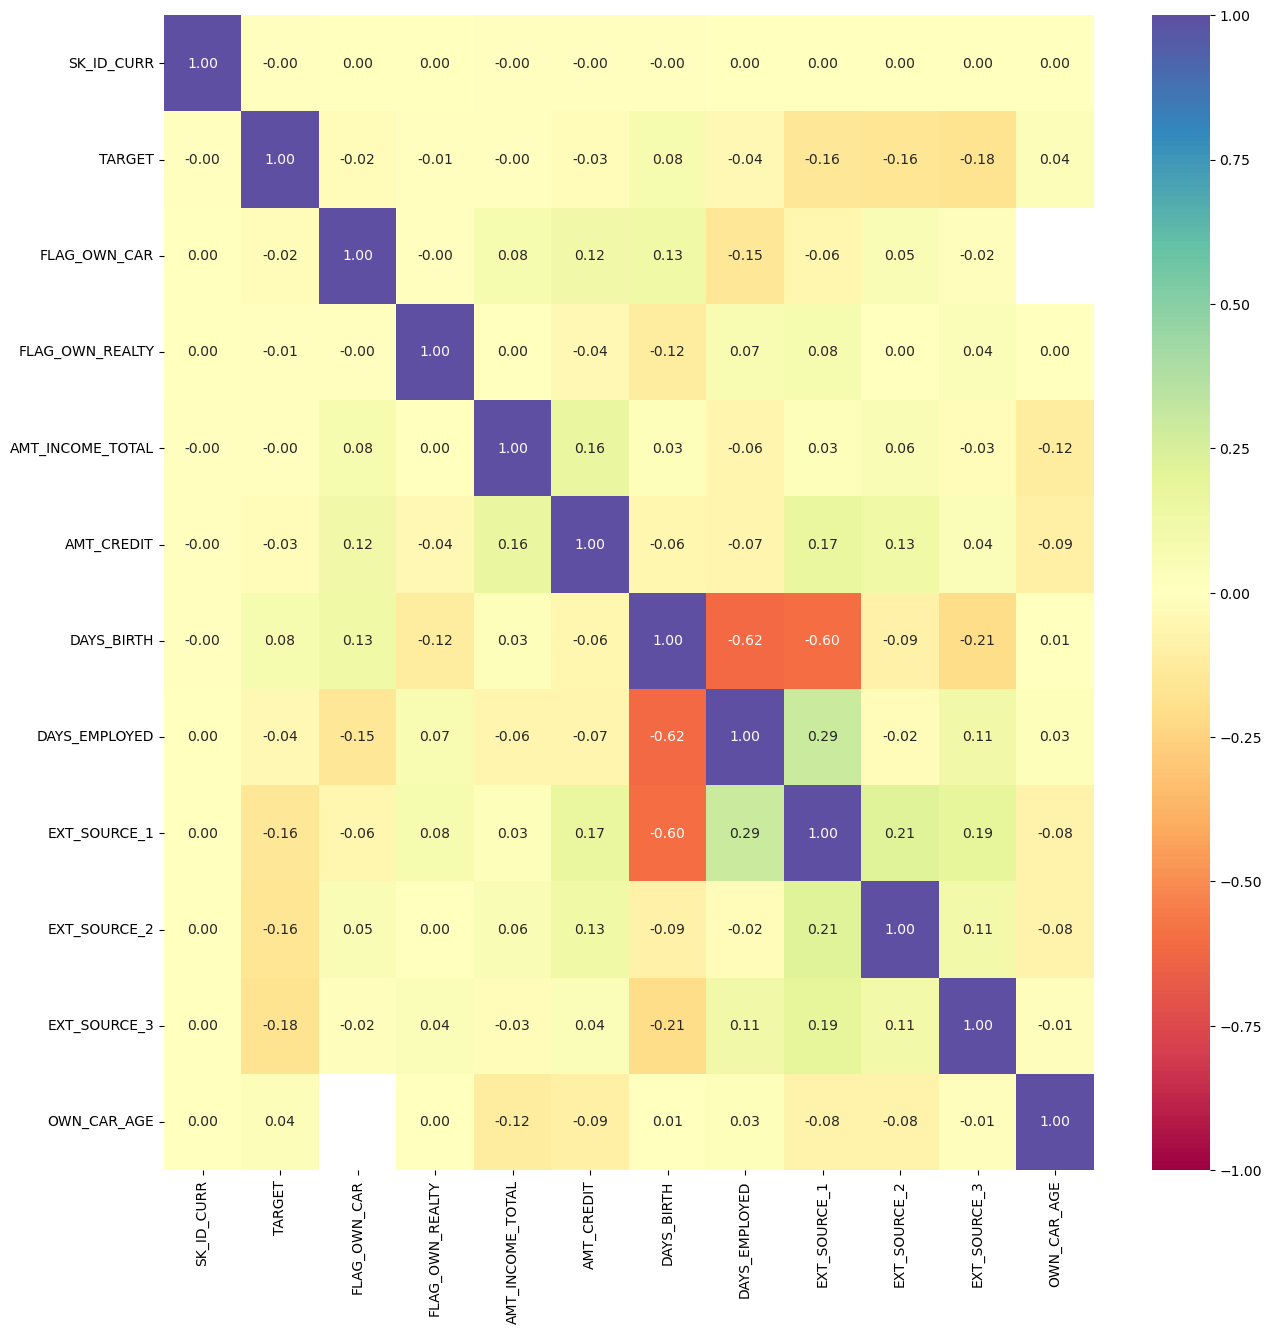

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'loan' is your DataFrame and 'numeric_cols' contains the names of your numeric columns
plt.figure(figsize=(15, 15))
heatmap1 = sns.heatmap(loan[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

# Save the figure in the same directory as the Jupyter notebook, without specifying the 'quality' parameter
plt.savefig('heatmap1.jpeg', format='jpeg', dpi=300)

# Show the plot (optional, as the plot will be saved even without displaying it)
plt.show()


# STOP

# MULTIVARIATE ANALYSIS -1

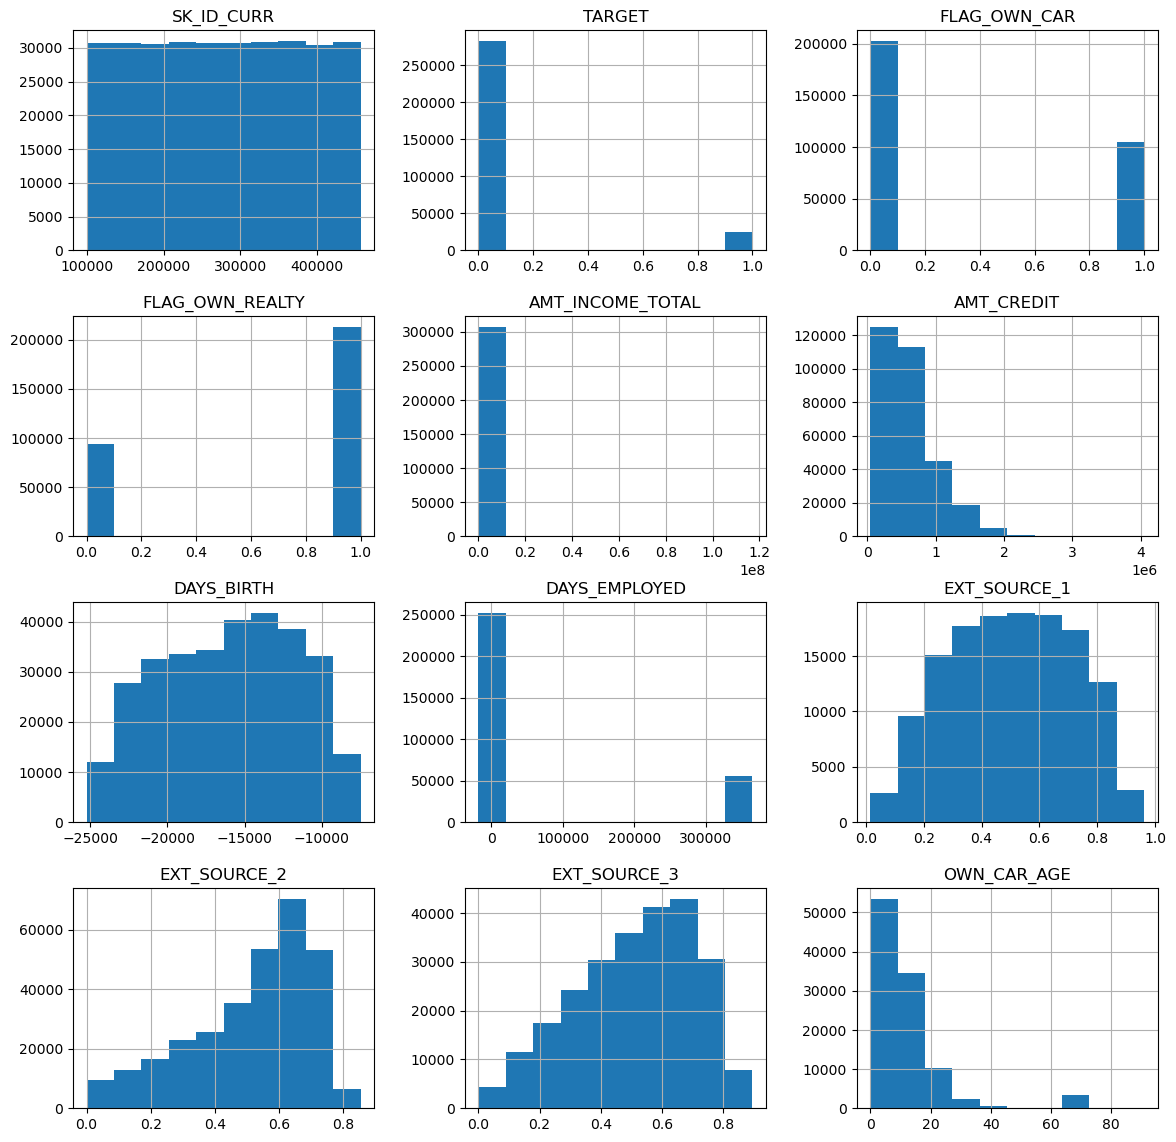

In [30]:
# creating histograms
loan[numeric_cols].hist(figsize=(14, 14))
plt.show()

The below three functions need to be defined to carry out the Exploratory Data Analysis.

CATEGORICAL

SECTION 1

In [31]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [32]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

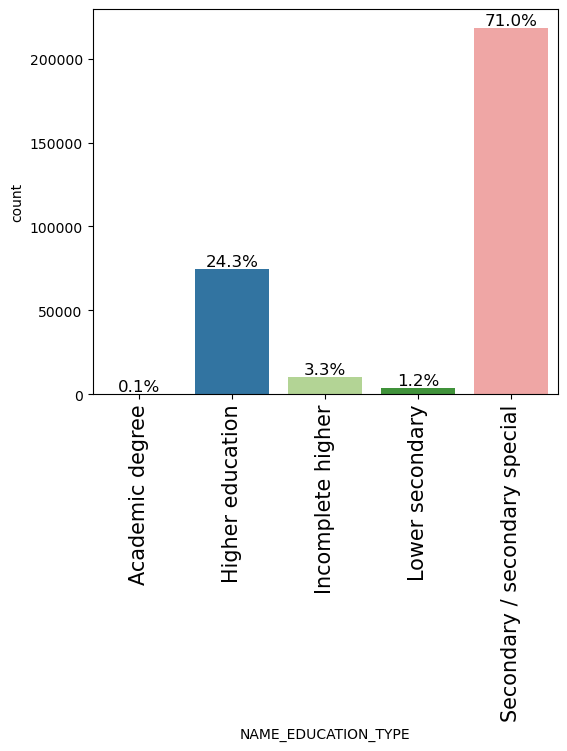

In [35]:
labeled_barplot(data, "NAME_EDUCATION_TYPE", perc=True)

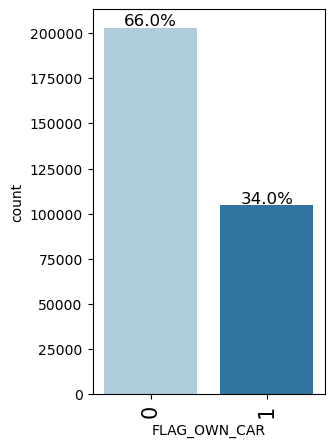

In [36]:
#FLAG_OWN_CAR
labeled_barplot(data, "FLAG_OWN_CAR", perc=True)

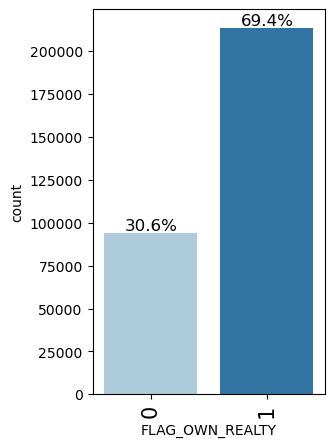

In [37]:
#FLAG_OWN_REALTY
labeled_barplot(data, "FLAG_OWN_REALTY", perc=True)

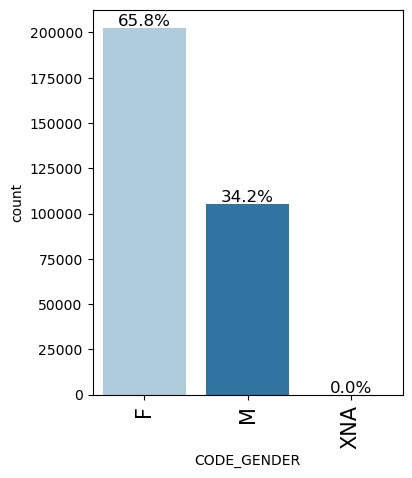

In [38]:
#CODE_GENDER
labeled_barplot(data, "CODE_GENDER", perc=True)

SECTION 2

CONTINOUS VARIABLES

In [39]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

In [40]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(loan1, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(loan1[z])  # length of the column
    plt.figure(figsize=(10, 5))
    # plt.xticks(rotation=45)
    ax = sns.countplot(loan1[z], palette="viridis")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

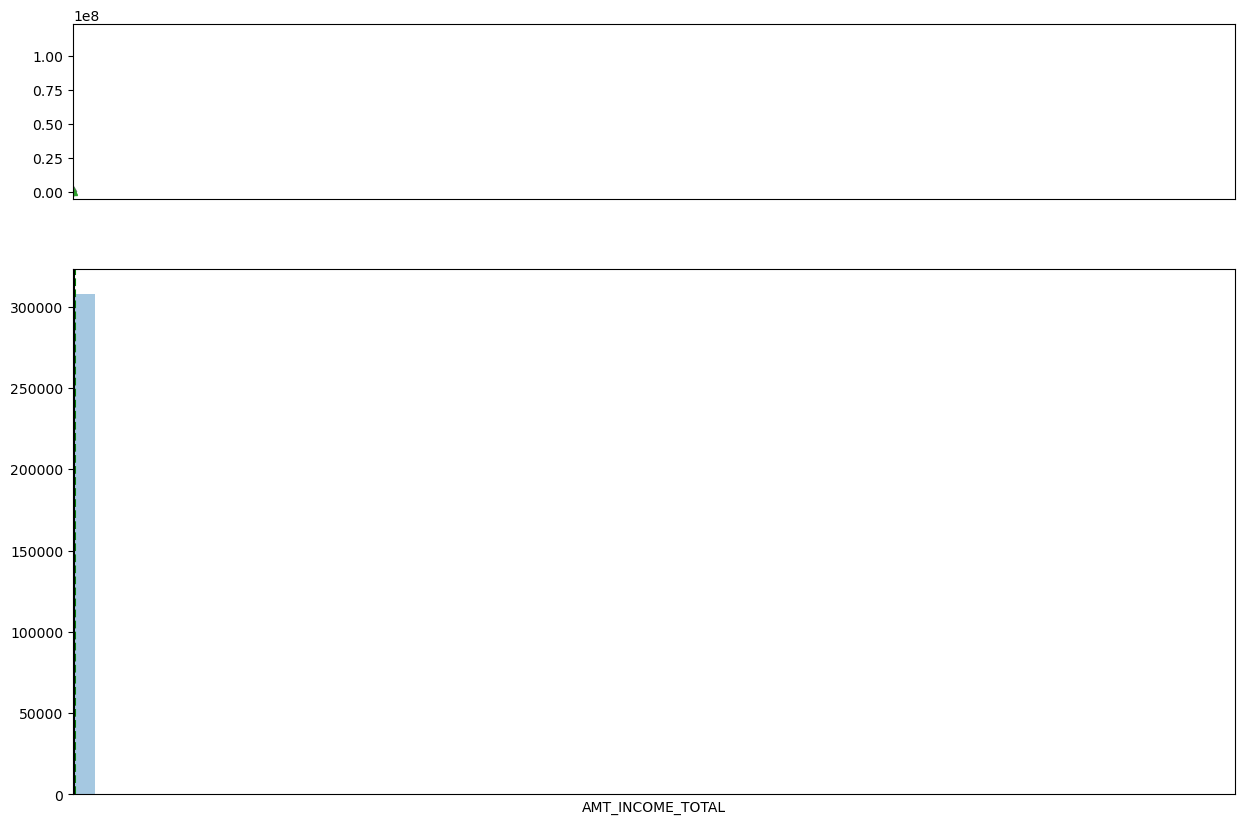

In [41]:
#AMT_INCOME_TOTAL
histogram_boxplot(data["AMT_INCOME_TOTAL"])

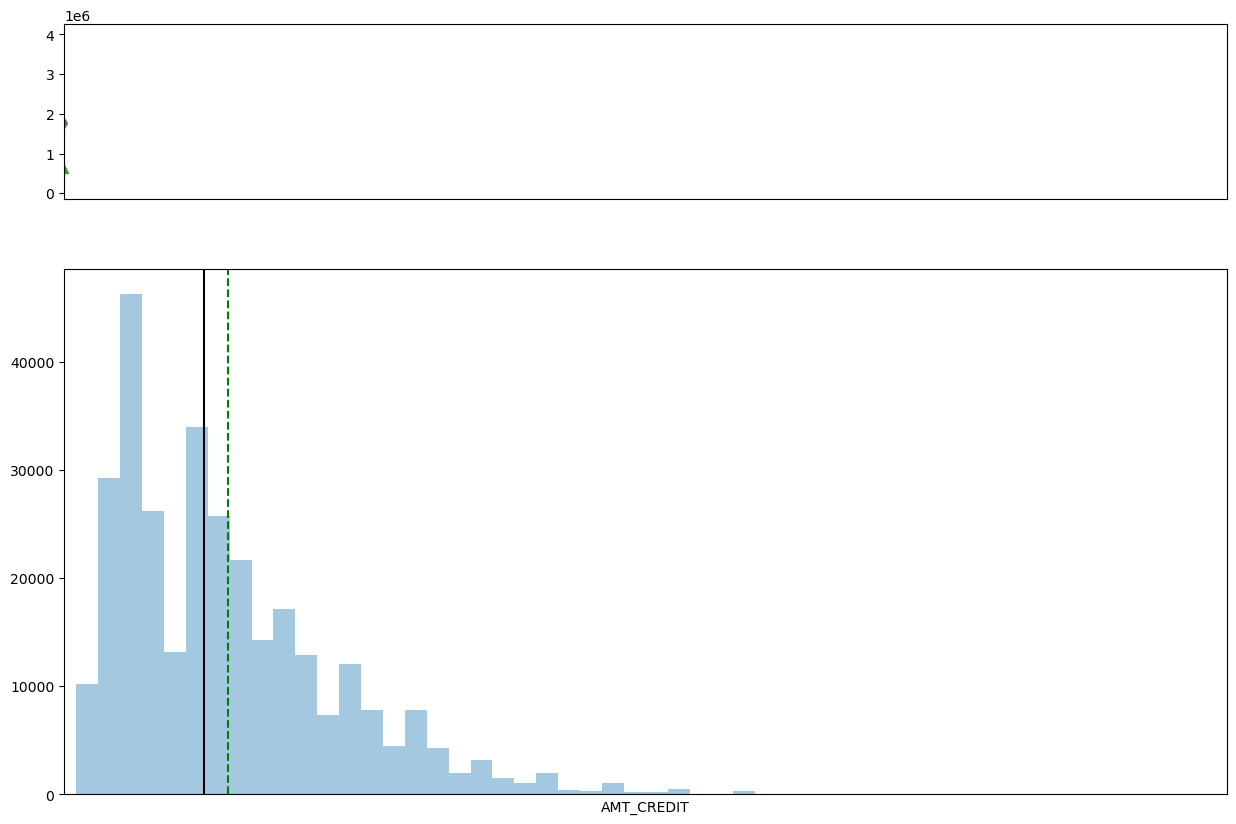

In [42]:
#AMT_CREDIT
histogram_boxplot(data["AMT_CREDIT"])

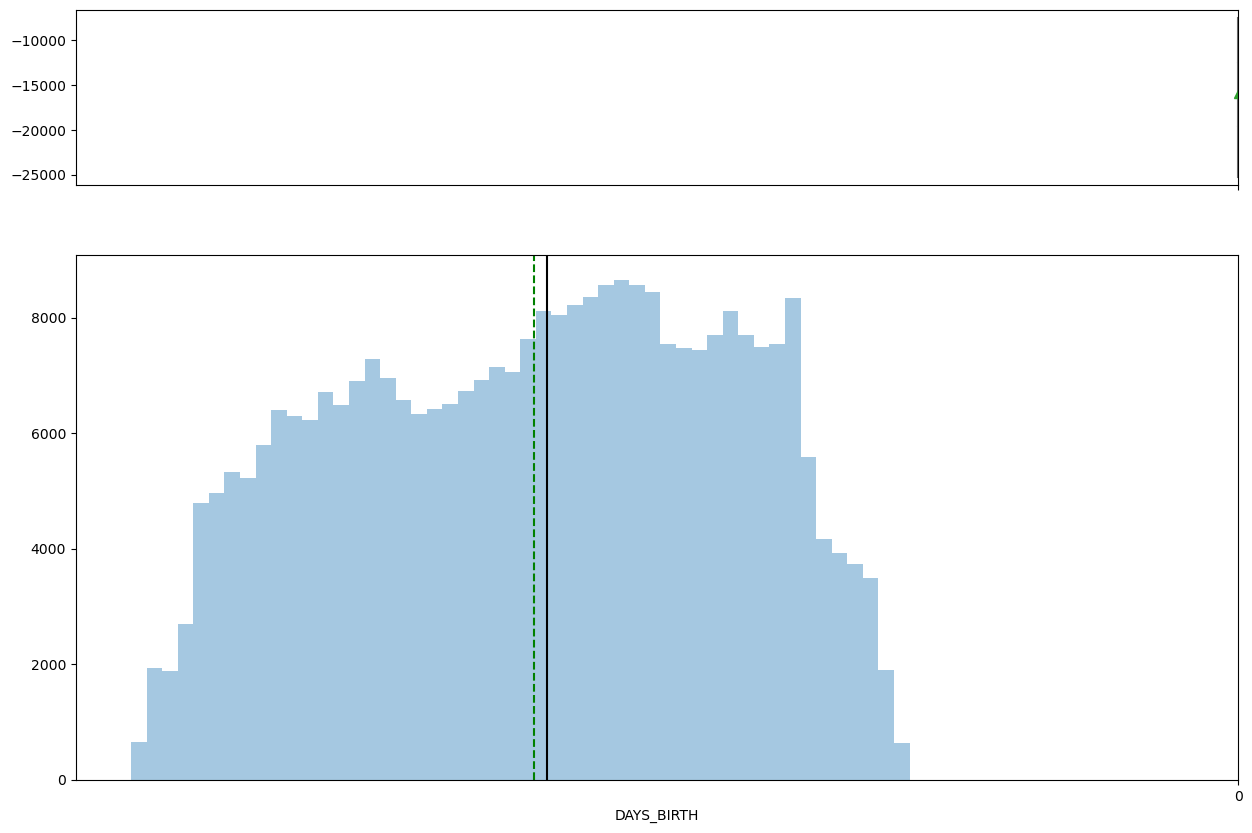

In [43]:
#DAYS_BIRTH
histogram_boxplot(data["DAYS_BIRTH"])

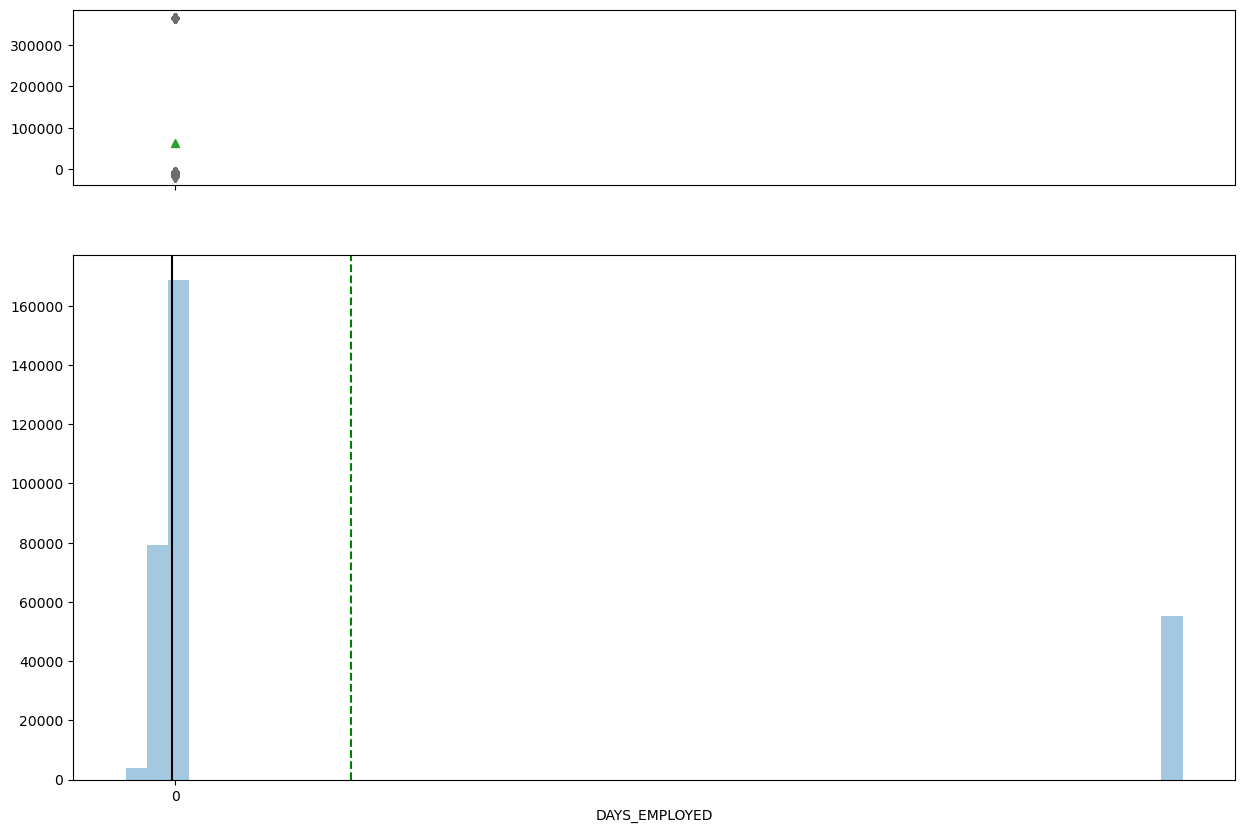

In [44]:
#DAYS_EMPLOYED
histogram_boxplot(data["DAYS_EMPLOYED"])

Strip Plot (AKA Jitter Plot)

<Axes: xlabel='AMT_INCOME_TOTAL'>

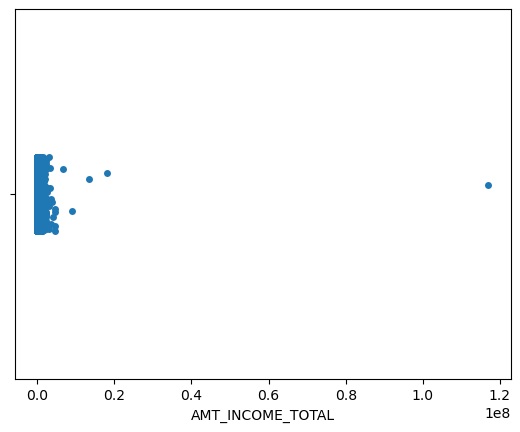

In [45]:
#AMT_INCOME_TOTAL
sns.stripplot(data=data, x='AMT_INCOME_TOTAL') # Call stripplot for the 'AMT_INCOME_TOTAL' column

<Axes: xlabel='AMT_CREDIT'>

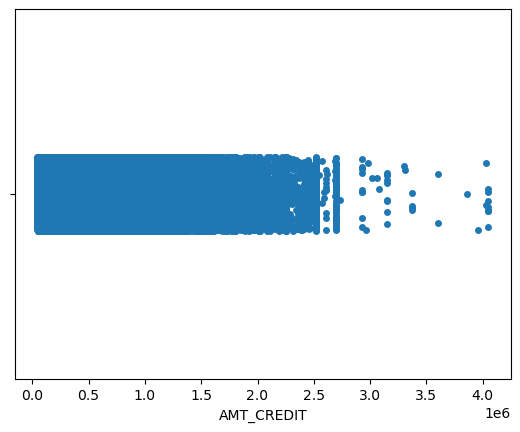

In [46]:
#AMT_CREDIT
sns.stripplot(data=data, x='AMT_CREDIT') # Call stripplot for the 'AMT_CREDIT' column

<Axes: xlabel='DAYS_BIRTH'>

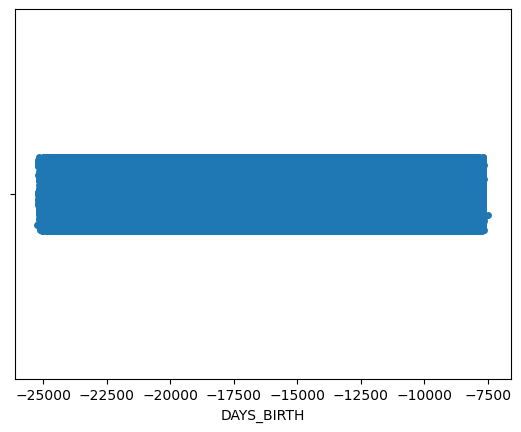

In [47]:
#DAYS_BIRTH
sns.stripplot(data=data, x='DAYS_BIRTH') # Call stripplot for the 'DAYS_BIRTH' column

<Axes: xlabel='DAYS_EMPLOYED'>

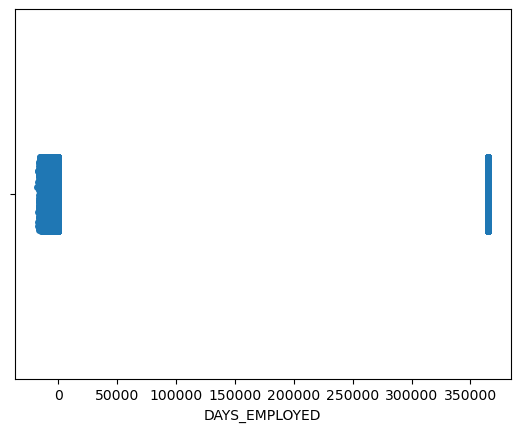

In [48]:
#DAYS_EMPLOYED
sns.stripplot(data=data, x='DAYS_EMPLOYED') # Call stripplot for the 'DAYS_EMPLOYED' column

<Axes: xlabel='EXT_SOURCE_2'>

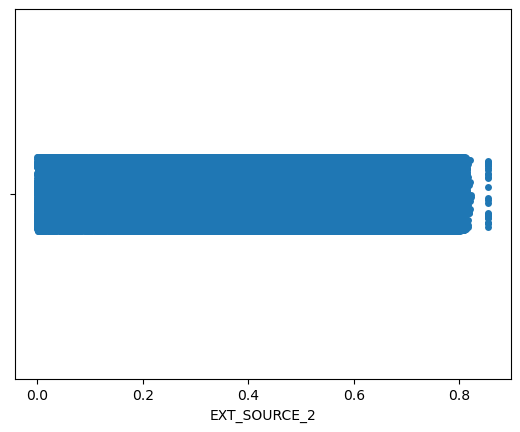

In [49]:
#EXT_SOURCE_2
sns.stripplot(data=data, x='EXT_SOURCE_2') # Call stripplot for the 'EXT_SOURCE_2' column

KDE Plot

Kernel Distribution Estimate of the probability density function.

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

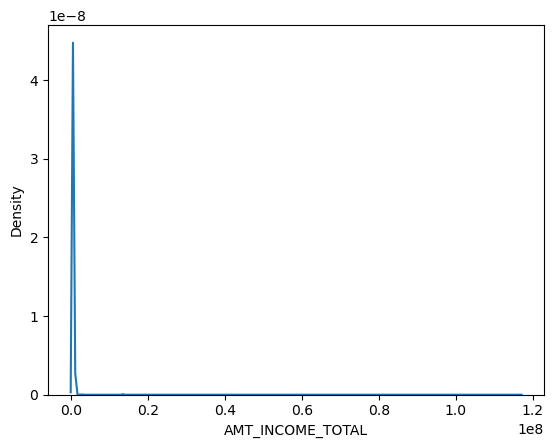

In [50]:
#AMT_INCOME_TOTAL
sns.kdeplot(data=data, x='AMT_INCOME_TOTAL')

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

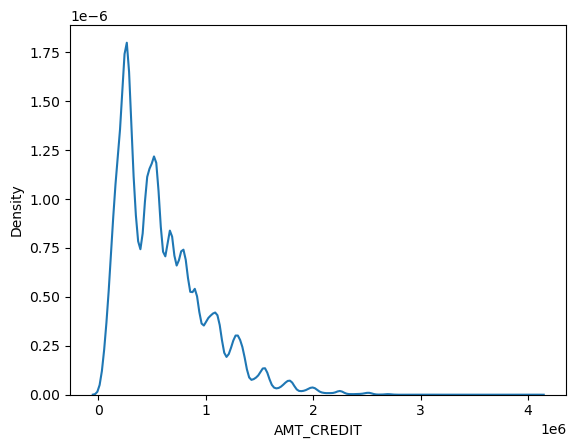

In [51]:
#AMT_CREDIT
sns.kdeplot(data=data, x='AMT_CREDIT')

<Axes: xlabel='DAYS_BIRTH', ylabel='Density'>

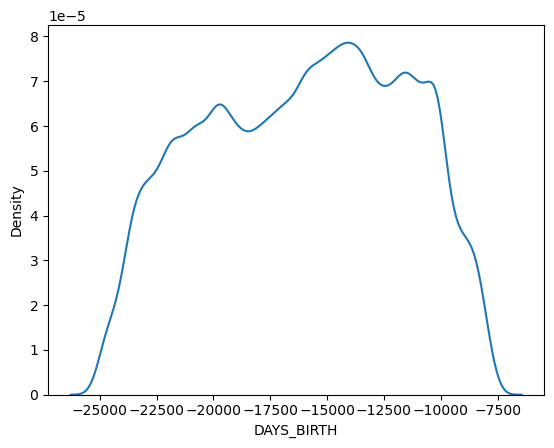

In [52]:
#DAYS_BIRTH
sns.kdeplot(data=data, x='DAYS_BIRTH')

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Density'>

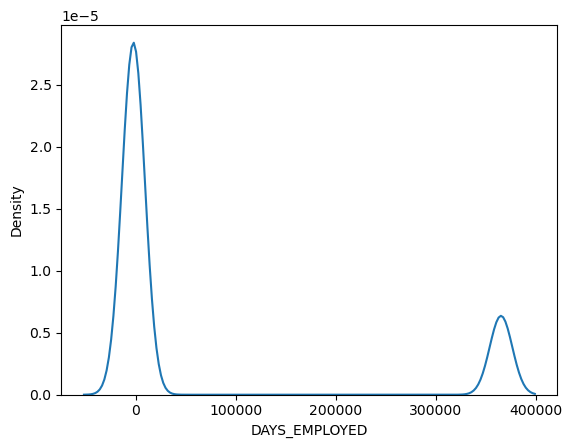

In [53]:
#DAYS_EMPLOYED
sns.kdeplot(data=data, x='DAYS_EMPLOYED')

Violin plot

<Axes: xlabel='AMT_INCOME_TOTAL'>

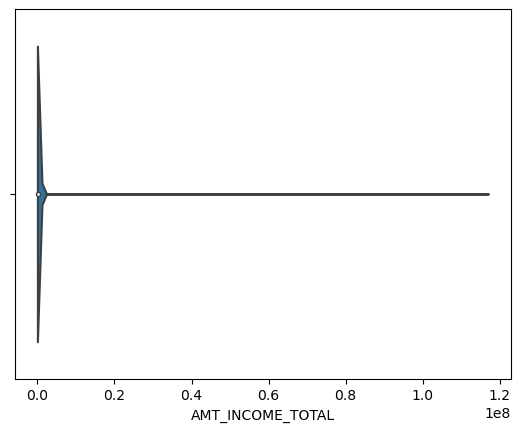

In [54]:
#AMT_INCOME_TOTAL
sns.violinplot(data=data, x='AMT_INCOME_TOTAL')

<Axes: xlabel='AMT_CREDIT'>

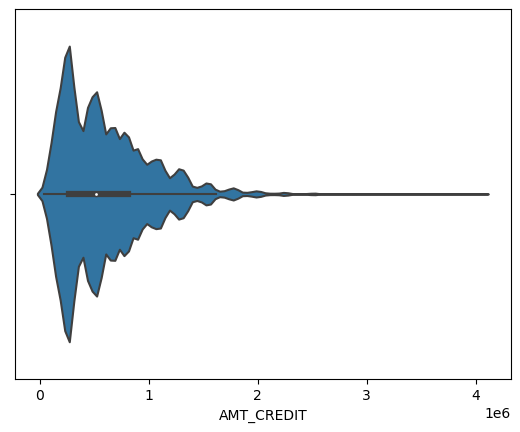

In [55]:
#AMT_CREDIT
sns.violinplot(data=data, x='AMT_CREDIT')

<Axes: xlabel='DAYS_BIRTH'>

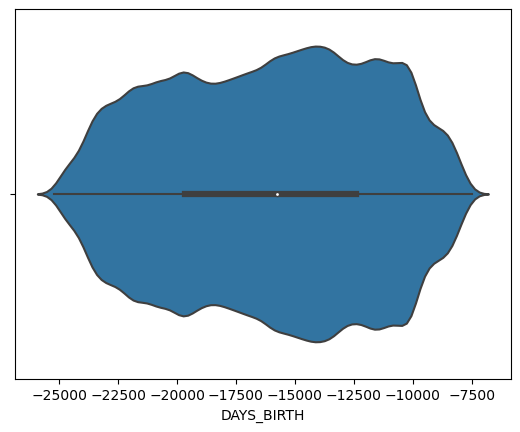

In [56]:
#DAYS_BIRTH
sns.violinplot(data=data, x='DAYS_BIRTH')

<Axes: xlabel='DAYS_EMPLOYED'>

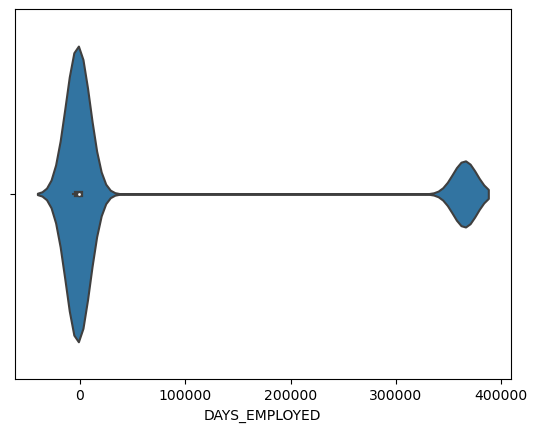

In [57]:
#DAYS_EMPLOYED
sns.violinplot(data=data, x='DAYS_EMPLOYED')

Categorical Variable — Countplot (AKA barchart)

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

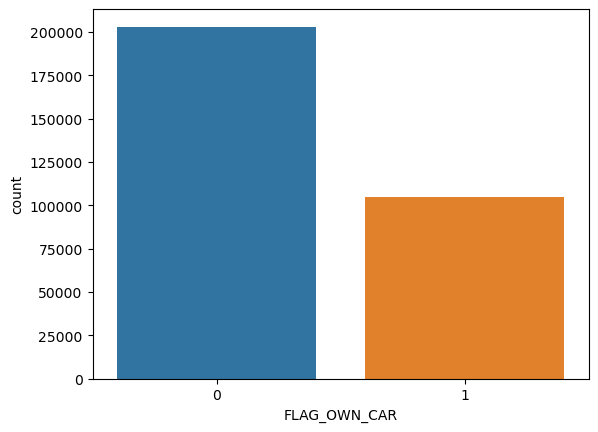

In [58]:
sns.countplot(data=data, x='FLAG_OWN_CAR') 

<Axes: xlabel='FLAG_OWN_CAR', ylabel='Count'>

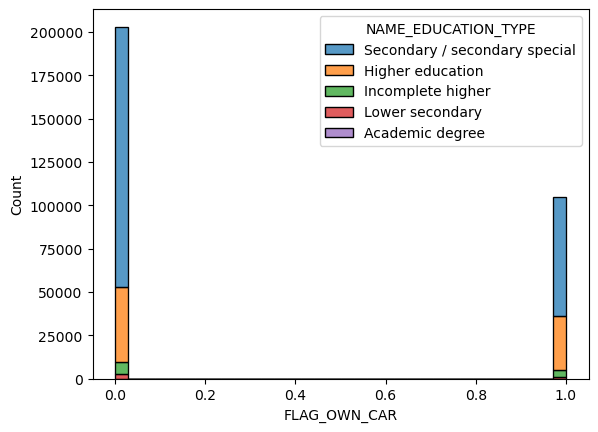

In [59]:
sns.histplot(data=data, x='FLAG_OWN_CAR', hue='NAME_EDUCATION_TYPE', multiple='stack') 

# Bivariate Analysis: Analysis of Two variables

Bivariate Plots

A. Categorical

     1. Line Plot — used to observe a trend; y has to be continious, x can be categorical or continious.
     
     2. Bar Plot — same as above
     
     3. Point Plot — same as above

B. Continuous

     1. Jointplot - a scatterplot with histograms that shows relationship between two continious variables.
     
     2. Pairplot — plots each continious variable against all other variables in the dataframe and displays results in a 
        grid helps identify correlated variables and other relationships.

# 1. TARGET and FLAG_OWN_CAR

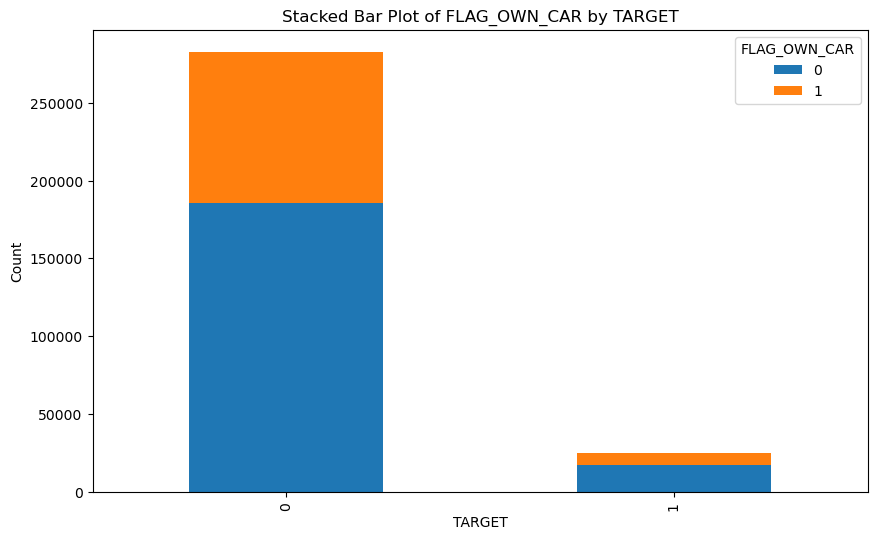

In [65]:
crosstab = pd.crosstab(data['TARGET'], data['FLAG_OWN_CAR'])

# Create the stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title (optional, customize as needed)
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of FLAG_OWN_CAR by TARGET')
plt.legend(title='FLAG_OWN_CAR')

# Save the figure in the same directory as the Jupyter notebook
plt.savefig('1.Stacked_Barplot_FLAG_OWN_CAR.jpeg', format='jpeg', dpi=300)

# Display the plot
plt.show()

Alternate Visual

FLAG_OWN_CAR       0       1     All
TARGET                              
All           202924  104587  307511
0             185675   97011  282686
1              17249    7576   24825
------------------------------------------------------------------------------------------------------------------------


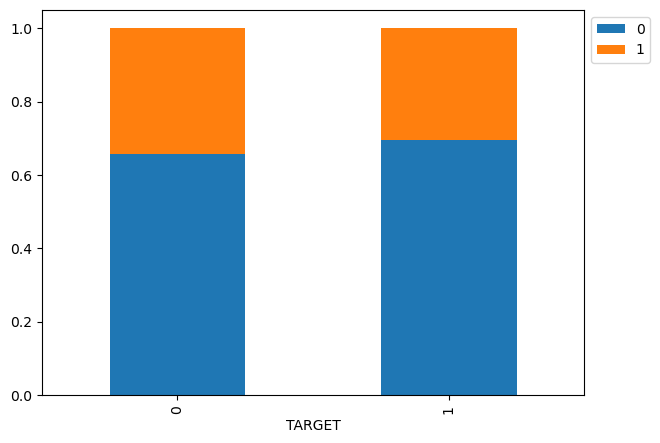

In [56]:
stacked_barplot(data, "TARGET", "FLAG_OWN_CAR")

In [57]:
#@title Line plot
#sns.lineplot(data=data, x='TARGET', y='FLAG_OWN_REALTY')

# 2. TARGET and FLAG_OWN_REALTY

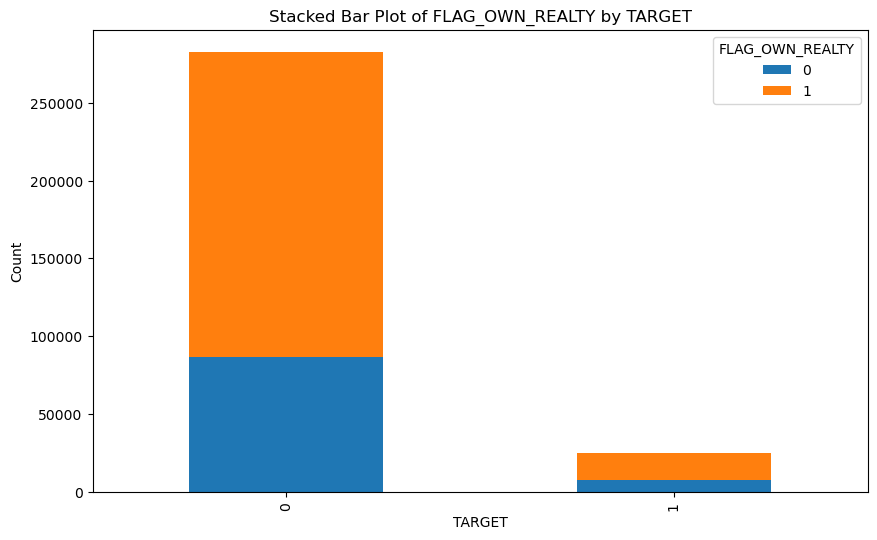

In [64]:
crosstab = pd.crosstab(data['TARGET'], data['FLAG_OWN_REALTY'])

# Create the stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title (optional, customize as needed)
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of FLAG_OWN_REALTY by TARGET')
plt.legend(title='FLAG_OWN_REALTY')

# Save the figure in the same directory as the Jupyter notebook
plt.savefig('2.Stacked_Barplot_FLAG_OWN_REALTY.jpeg', format='jpeg', dpi=300)

# Display the plot
plt.show()

Alternate

FLAG_OWN_REALTY      0       1     All
TARGET                                
All              94199  213312  307511
0                86357  196329  282686
1                 7842   16983   24825
------------------------------------------------------------------------------------------------------------------------


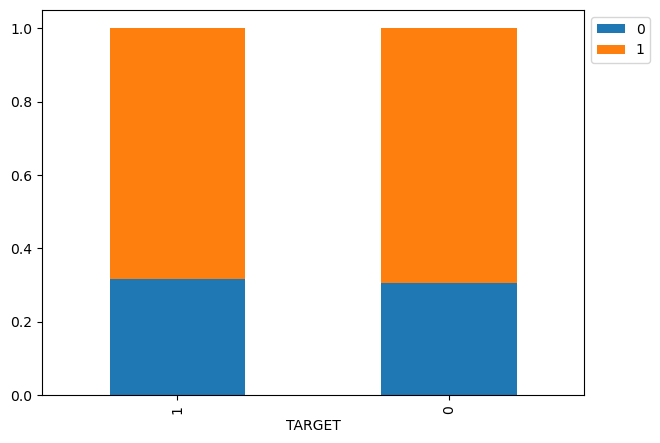

In [58]:
stacked_barplot(data, "TARGET", "FLAG_OWN_REALTY")

# 3. TARGET AND AMT_INCOME_TOTAL

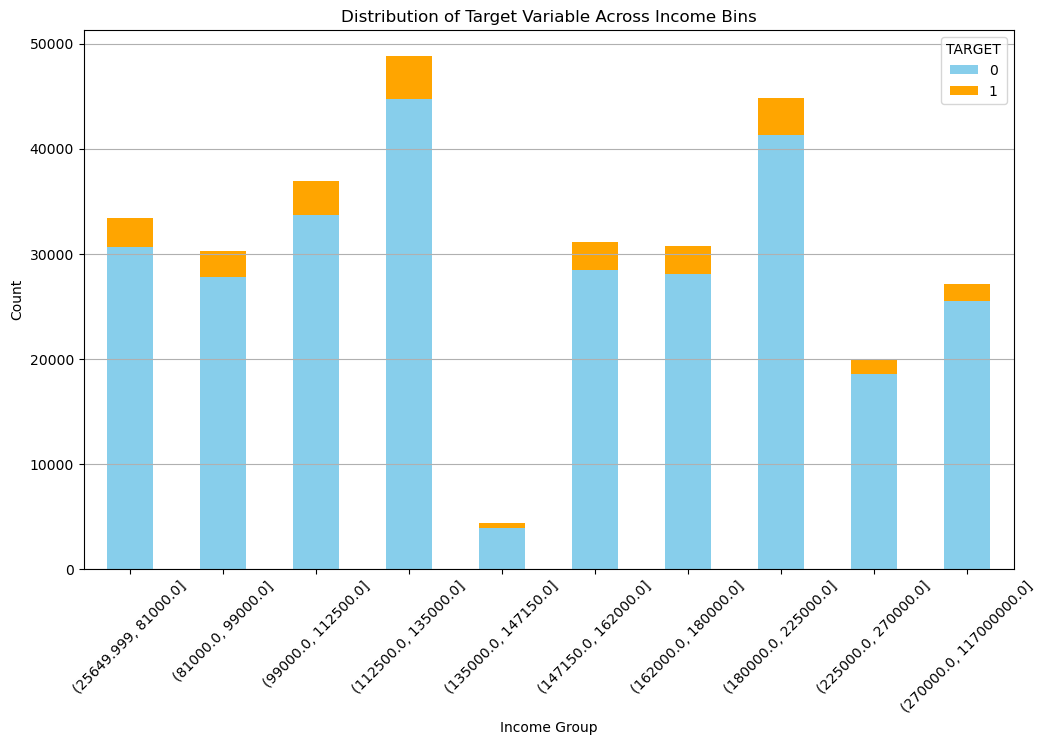

TARGET                        0      1   Total
INCOME_BIN                                    
(25649.999, 81000.0]      30656   2735   33391
(81000.0, 99000.0]        27790   2490   30280
(99000.0, 112500.0]       33689   3218   36907
(112500.0, 135000.0]      44702   4147   48849
(135000.0, 147150.0]       3943    390    4333
(147150.0, 162000.0]      28431   2689   31120
(162000.0, 180000.0]      28118   2586   30704
(180000.0, 225000.0]      41311   3498   44809
(225000.0, 270000.0]      18552   1405   19957
(270000.0, 117000000.0]   25494   1667   27161
Grand Total              282686  24825  307511

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already defined
data['INCOME_BIN'] = pd.qcut(data['AMT_INCOME_TOTAL'], q=10)
grouped_data = data.groupby(['INCOME_BIN', 'TARGET']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title('Distribution of Target Variable Across Income Bins')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the figure as a JPEG file
plt.savefig('3.Income_Distribution.jpeg', format='jpeg', dpi=300)

plt.show()

grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data.loc['Grand Total'] = grouped_data.sum(axis=0)

# Display the modified table
grouped_data


# 4. TARGET AND AMT_CREDIT

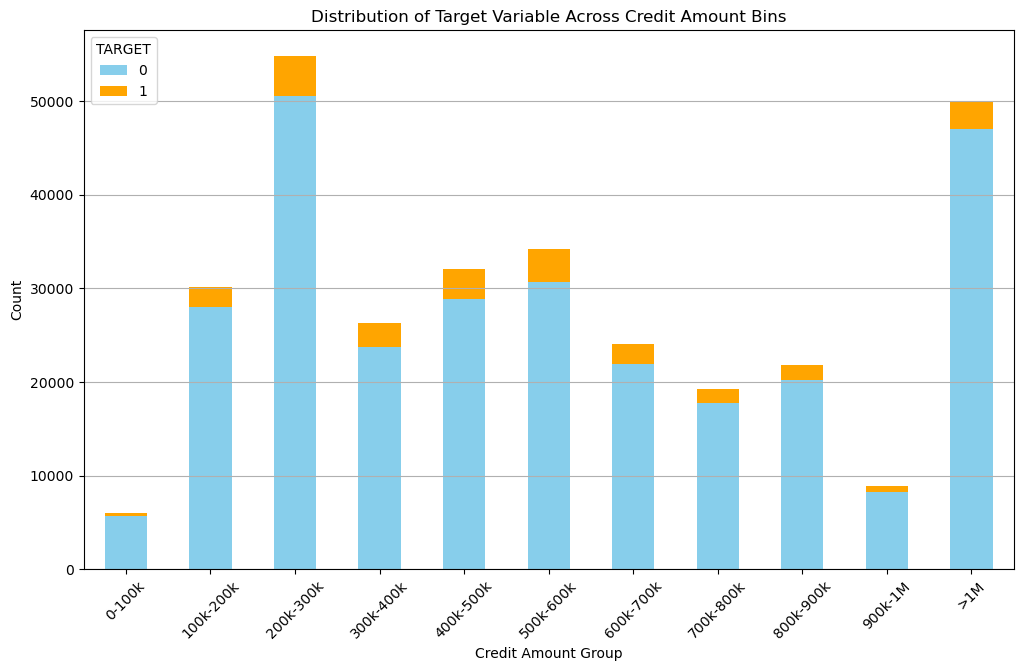

TARGET            0      1   Total
CREDIT_BIN                        
0-100k         5673    331    6004
100k-200k     27981   2159   30140
200k-300k     50492   4321   54813
300k-400k     23715   2623   26338
400k-500k     28867   3171   32038
500k-600k     30709   3523   34232
600k-700k     21952   2097   24049
700k-800k     17727   1466   19193
800k-900k     20237   1555   21792
900k-1M        8280    647    8927
>1M           47053   2932   49985
Grand Total  282686  24825  307511

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already defined

# Define bins and labels for the credit amount
credit_bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, np.inf]
credit_labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M', '>1M']

# Categorize the credit amount into bins
data['CREDIT_BIN'] = pd.cut(data['AMT_CREDIT'], bins=credit_bins, labels=credit_labels)

# Group the data by 'CREDIT_BIN' and 'TARGET' and count occurrences
credit_grouped_data = data.groupby(['CREDIT_BIN', 'TARGET']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
credit_grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title('Distribution of Target Variable Across Credit Amount Bins')
plt.xlabel('Credit Amount Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the figure as a JPEG file
plt.savefig('4.Credit_Distribution.jpeg', format='jpeg', dpi=300)

plt.show()

# Add totals for display purposes
credit_grouped_data['Total'] = credit_grouped_data.sum(axis=1)
credit_grouped_data.loc['Grand Total'] = credit_grouped_data.sum(axis=0)

# Display the table with totals
credit_grouped_data


# 5. TARGET AND NAME_EDUCATION_TYPE

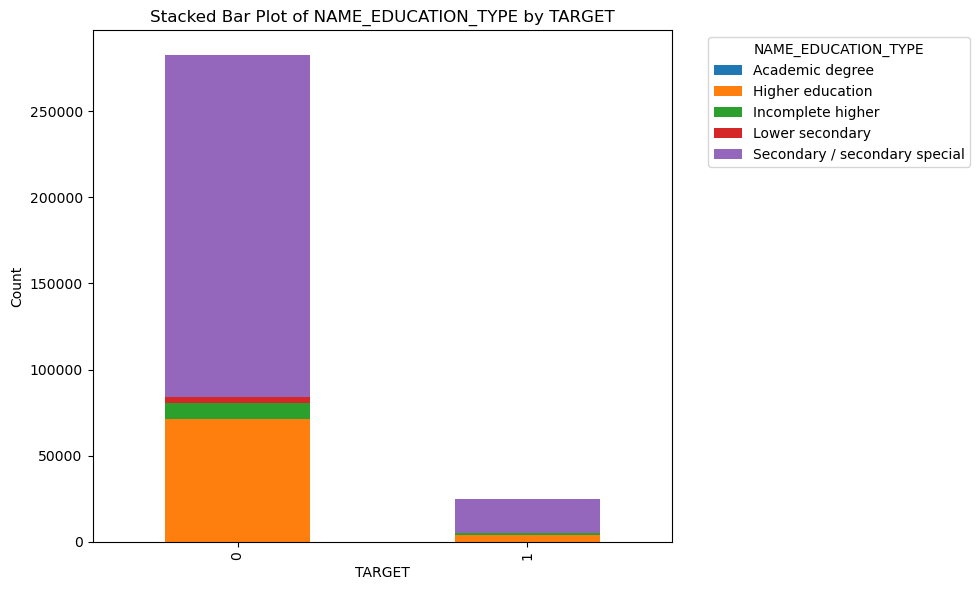

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and it has columns "TARGET" and "NAME_EDUCATION_TYPE"
# Create a cross-tabulation of the two columns
crosstab = pd.crosstab(data['TARGET'], data['NAME_EDUCATION_TYPE'])

# Create the stacked bar plot
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title (optional, customize as needed)
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of NAME_EDUCATION_TYPE by TARGET')
plt.legend(title='NAME_EDUCATION_TYPE', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure in the same directory as the Jupyter notebook
plt.savefig('5.Education_Stacked_Barplot.jpeg', format='jpeg', dpi=300)

# Display the plot
plt.show()


Alternate

NAME_EDUCATION_TYPE  Academic degree  Higher education  Incomplete higher  \
TARGET                                                                      
All                              164             74863              10277   
0                                161             70854               9405   
1                                  3              4009                872   

NAME_EDUCATION_TYPE  Lower secondary  Secondary / secondary special     All  
TARGET                                                                       
All                             3816                         218391  307511  
0                               3399                         198867  282686  
1                                417                          19524   24825  
------------------------------------------------------------------------------------------------------------------------


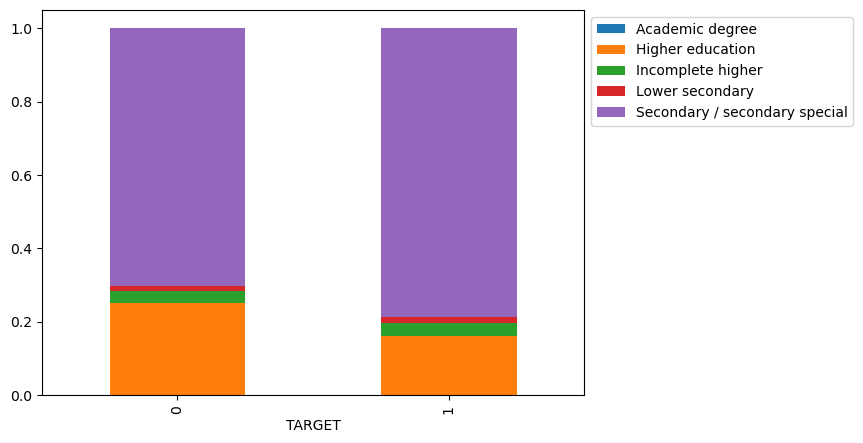

In [61]:
stacked_barplot(data, "TARGET", "NAME_EDUCATION_TYPE")

Alternate Visual

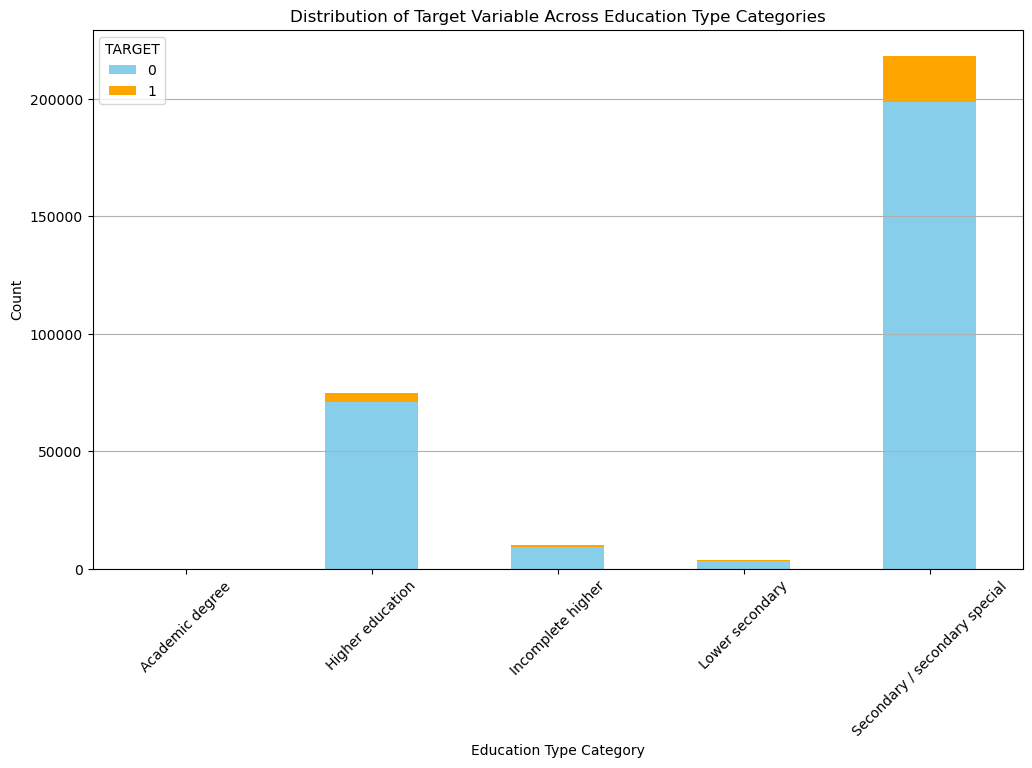

TARGET                              0      1   Total
NAME_EDUCATION_TYPE                                 
Academic degree                   161      3     164
Higher education                70854   4009   74863
Incomplete higher                9405    872   10277
Lower secondary                  3399    417    3816
Secondary / secondary special  198867  19524  218391
Grand Total                    282686  24825  307511

In [62]:
# Group the data by 'NAME_EDUCATION_TYPE' and 'TARGET' and count occurrences
education_grouped = data.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack(fill_value=0)

# Plotting the distribution without totals
plt.figure(figsize=(12, 7))
education_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title('Distribution of Target Variable Across Education Type Categories')
plt.xlabel('Education Type Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Now, add the totals to the table for display purposes
# Adding a 'Total' column to sum each row (category totals)
education_grouped['Total'] = education_grouped.sum(axis=1)

# Adding a 'Grand Total' row to sum each column (including the category totals for a grand total)
education_grouped.loc['Grand Total'] = education_grouped.sum(axis=0)

# Display the table with the 'Total' column and 'Grand Total' row
education_grouped


# 6. TARGET AND DAYS_BIRTH

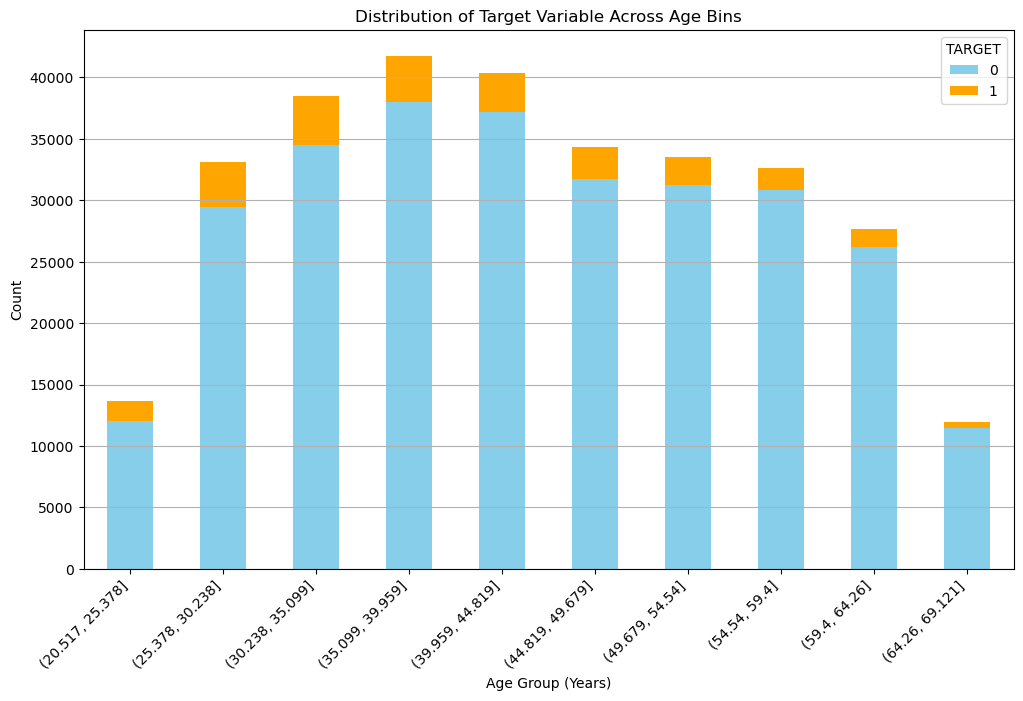

TARGET                 0      1   Total
AGE_BIN_LABEL                          
(20.517, 25.378]   12010   1669   13679
(25.378, 30.238]   29437   3690   33127
(30.238, 35.099]   34514   3916   38430
(35.099, 39.959]   38022   3736   41758
(39.959, 44.819]   37163   3187   40350
(44.819, 49.679]   31757   2554   34311
(49.679, 54.54]    31266   2278   33544
(54.54, 59.4]      30824   1826   32650
(59.4, 64.26]      26219   1466   27685
(64.26, 69.121]    11474    503   11977
Grand Total       282686  24825  307511

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already defined

# Convert 'DAYS_BIRTH' from days to years
data['AGE_YEARS'] = data['DAYS_BIRTH'].abs() / 365

# Generate 10 equal-width bins for ages in years
age_bins = np.linspace(data['AGE_YEARS'].min(), data['AGE_YEARS'].max(), 11)

# Categorize age into bins
data['AGE_BIN'] = pd.cut(data['AGE_YEARS'], bins=age_bins, include_lowest=True, labels=False)

# Creating custom labels for the bins
data['AGE_BIN_LABEL'] = pd.cut(data['AGE_YEARS'], bins=age_bins, include_lowest=True)

# Group the data by 'AGE_BIN_LABEL' and 'TARGET' and count occurrences
age_grouped_data = data.groupby(['AGE_BIN_LABEL', 'TARGET']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
age_grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title('Distribution of Target Variable Across Age Bins')
plt.xlabel('Age Group (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')

# Save the figure as a JPEG file
plt.savefig('6.Age_Distribution.jpeg', format='jpeg', dpi=300)

plt.show()

# Add totals for display purposes
age_grouped_data['Total'] = age_grouped_data.sum(axis=1)
age_grouped_data.loc['Grand Total'] = age_grouped_data.sum(axis=0)

# Display the table with totals
age_grouped_data


# 7. TARGET AND DAYS_EMPLOYED

In [64]:
# Generate summary statistics for 'DAYS_EMPLOYED'
days_employed_stats = data['DAYS_EMPLOYED'].describe()

# Print the summary statistics
print(days_employed_stats)


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


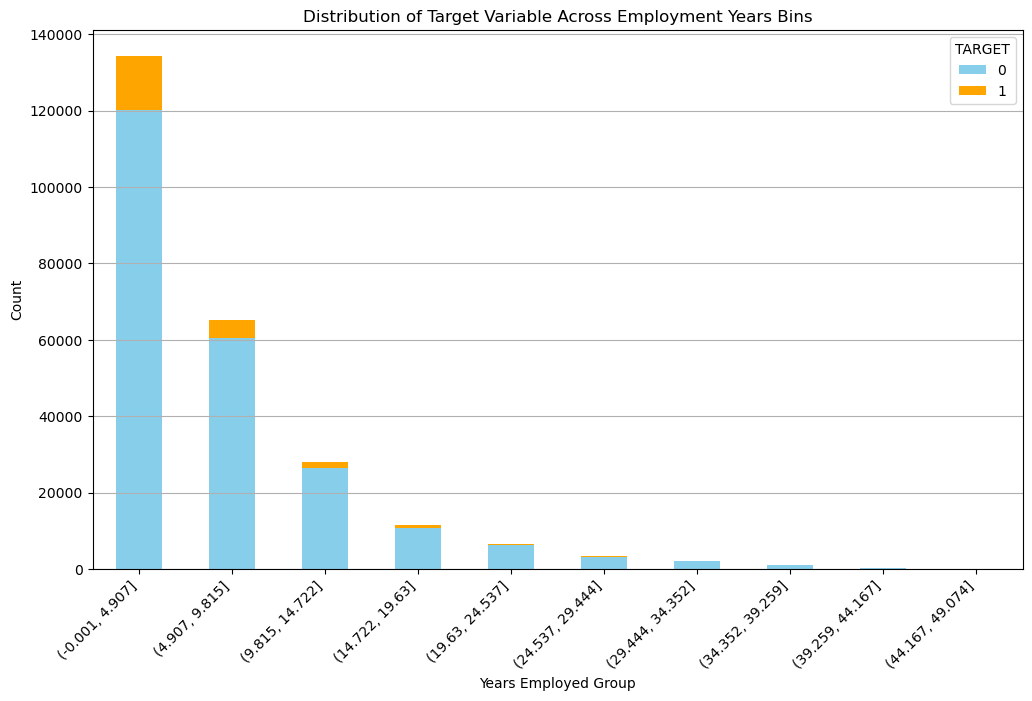

TARGET                   0      1   Total
EMPLOYED_BIN_LABEL                       
(-0.001, 4.907]     120127  14265  134392
(4.907, 9.815]       60356   4832   65188
(9.815, 14.722]      26318   1614   27932
(14.722, 19.63]      10816    566   11382
(19.63, 24.537]       6252    311    6563
(24.537, 29.444]      3249    138    3387
(29.444, 34.352]      1943     84    2027
(34.352, 39.259]       933     22     955
(39.259, 44.167]       258      3     261
(44.167, 49.074]        50      0      50
Grand Total         230302  21835  252137

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already defined

# Convert 'DAYS_EMPLOYED' from days to years and handle anomalies
data['YEARS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs() / 365
data['YEARS_EMPLOYED'] = data['YEARS_EMPLOYED'].apply(lambda x: np.nan if x > 1000 else x)

# Generate 10 equal-width bins for 'YEARS_EMPLOYED'
employed_bins = np.linspace(data['YEARS_EMPLOYED'].min(), data['YEARS_EMPLOYED'].max(), 11)

# Categorize 'YEARS_EMPLOYED' into bins
data['EMPLOYED_BIN'] = pd.cut(data['YEARS_EMPLOYED'], bins=employed_bins, include_lowest=True, labels=False)

# Creating custom labels for the bins
data['EMPLOYED_BIN_LABEL'] = pd.cut(data['YEARS_EMPLOYED'], bins=employed_bins, include_lowest=True)

# Group the data by 'EMPLOYED_BIN_LABEL' and 'TARGET' and count occurrences
employed_grouped_data = data.groupby(['EMPLOYED_BIN_LABEL', 'TARGET']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
employed_grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title('Distribution of Target Variable Across Employment Years Bins')
plt.xlabel('Years Employed Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')

# Save the figure as a JPEG file
plt.savefig('7.Employment_Distribution.jpeg', format='jpeg', dpi=300)

plt.show()

# Add totals for display purposes
employed_grouped_data['Total'] = employed_grouped_data.sum(axis=1)
employed_grouped_data.loc['Grand Total'] = employed_grouped_data.sum(axis=0)

# Display the table with totals
employed_grouped_data


# 8. TARGET and NAME_INCOME_TYPE - A

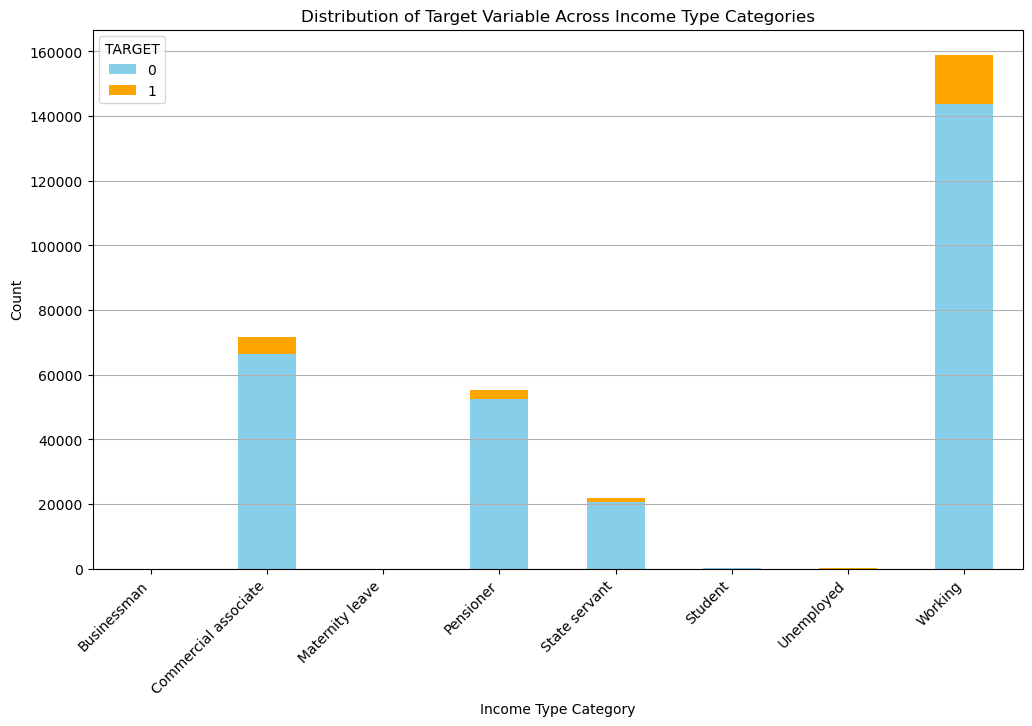

TARGET                     0      1   Total
NAME_INCOME_TYPE                           
Businessman               10      0      10
Commercial associate   66257   5360   71617
Maternity leave            3      2       5
Pensioner              52380   2982   55362
State servant          20454   1249   21703
Student                   18      0      18
Unemployed                14      8      22
Working               143550  15224  158774
Grand Total           282686  24825  307511

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already defined

# Group the data by 'NAME_INCOME_TYPE' and 'TARGET' and count occurrences
income_type_grouped = data.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
income_type_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title('Distribution of Target Variable Across Income Type Categories')
plt.xlabel('Income Type Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')

# Save the figure as a JPEG file
plt.savefig('8.Income_Type_Distribution.jpeg', format='jpeg', dpi=300)

plt.show()

# Add totals for display purposes
income_type_grouped['Total'] = income_type_grouped.sum(axis=1)
income_type_grouped.loc['Grand Total'] = income_type_grouped.sum(axis=0)

# Display the table with totals
income_type_grouped


Alternate

# 8. TARGET and NAME_INCOME_TYPE - B

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
All                        10                 71617                5   
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  \
TARGET                                                                     
All                   55362          21703       18          22   158774   
0                     52380          20454       18          14   143550   
1                      2982           1249        0           8    15224   

NAME_INCOME_TYPE     All  
TARGET                    
All               307511  
0                 282686  
1                  24825  
------------------------------------------------------------------------------------------------------------------------


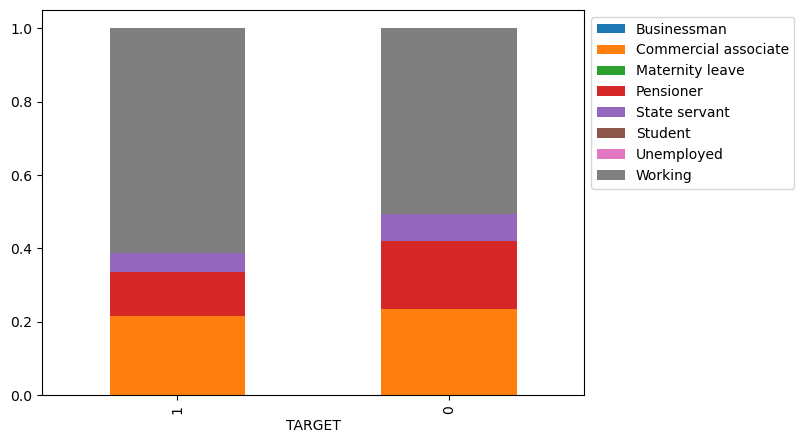

In [66]:
stacked_barplot(data, "TARGET", "NAME_INCOME_TYPE")

# 9. TARGET and CODE_GENDER - A

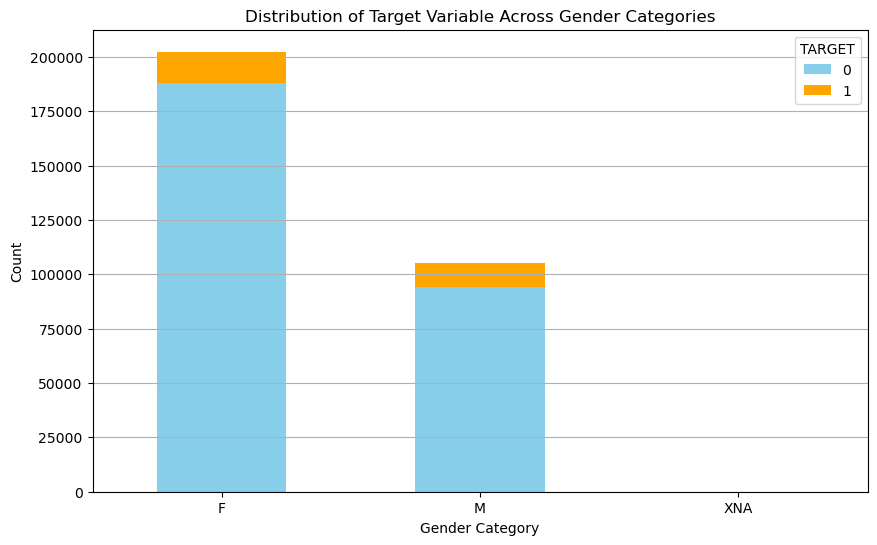

TARGET            0      1   Total
CODE_GENDER                       
F            188278  14170  202448
M             94404  10655  105059
XNA               4      0       4
Grand Total  282686  24825  307511

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it's already defined

# Group the data by 'CODE_GENDER' and 'TARGET' and count occurrences
gender_grouped = data.groupby(['CODE_GENDER', 'TARGET']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
gender_grouped.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
plt.title('Distribution of Target Variable Across Gender Categories')
plt.xlabel('Gender Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Save the figure as a JPEG file
plt.savefig('9.Gender_Distribution.jpeg', format='jpeg', dpi=300)

plt.show()

# Add totals for display purposes
gender_grouped['Total'] = gender_grouped.sum(axis=1)
gender_grouped.loc['Grand Total'] = gender_grouped.sum(axis=0)

# Display the table with totals
gender_grouped


# 9. TARGET and CODE_GENDER - B

CODE_GENDER       F       M  XNA     All
TARGET                                  
0            188278   94404    4  282686
All          202448  105059    4  307511
1             14170   10655    0   24825
------------------------------------------------------------------------------------------------------------------------


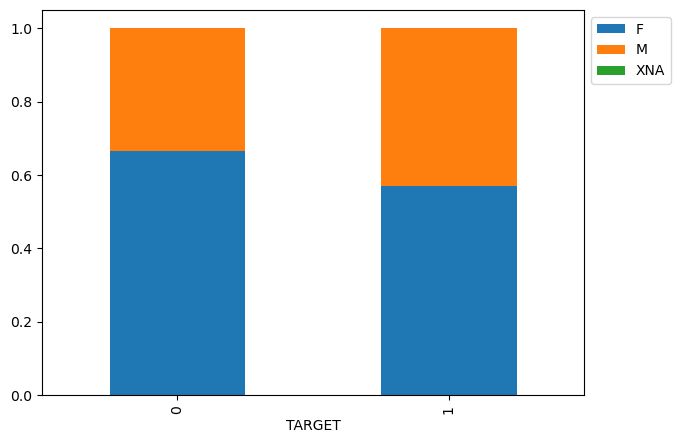

In [69]:
stacked_barplot(data, "TARGET", "CODE_GENDER")

# MULTIVARIATE ANALYSIS 2

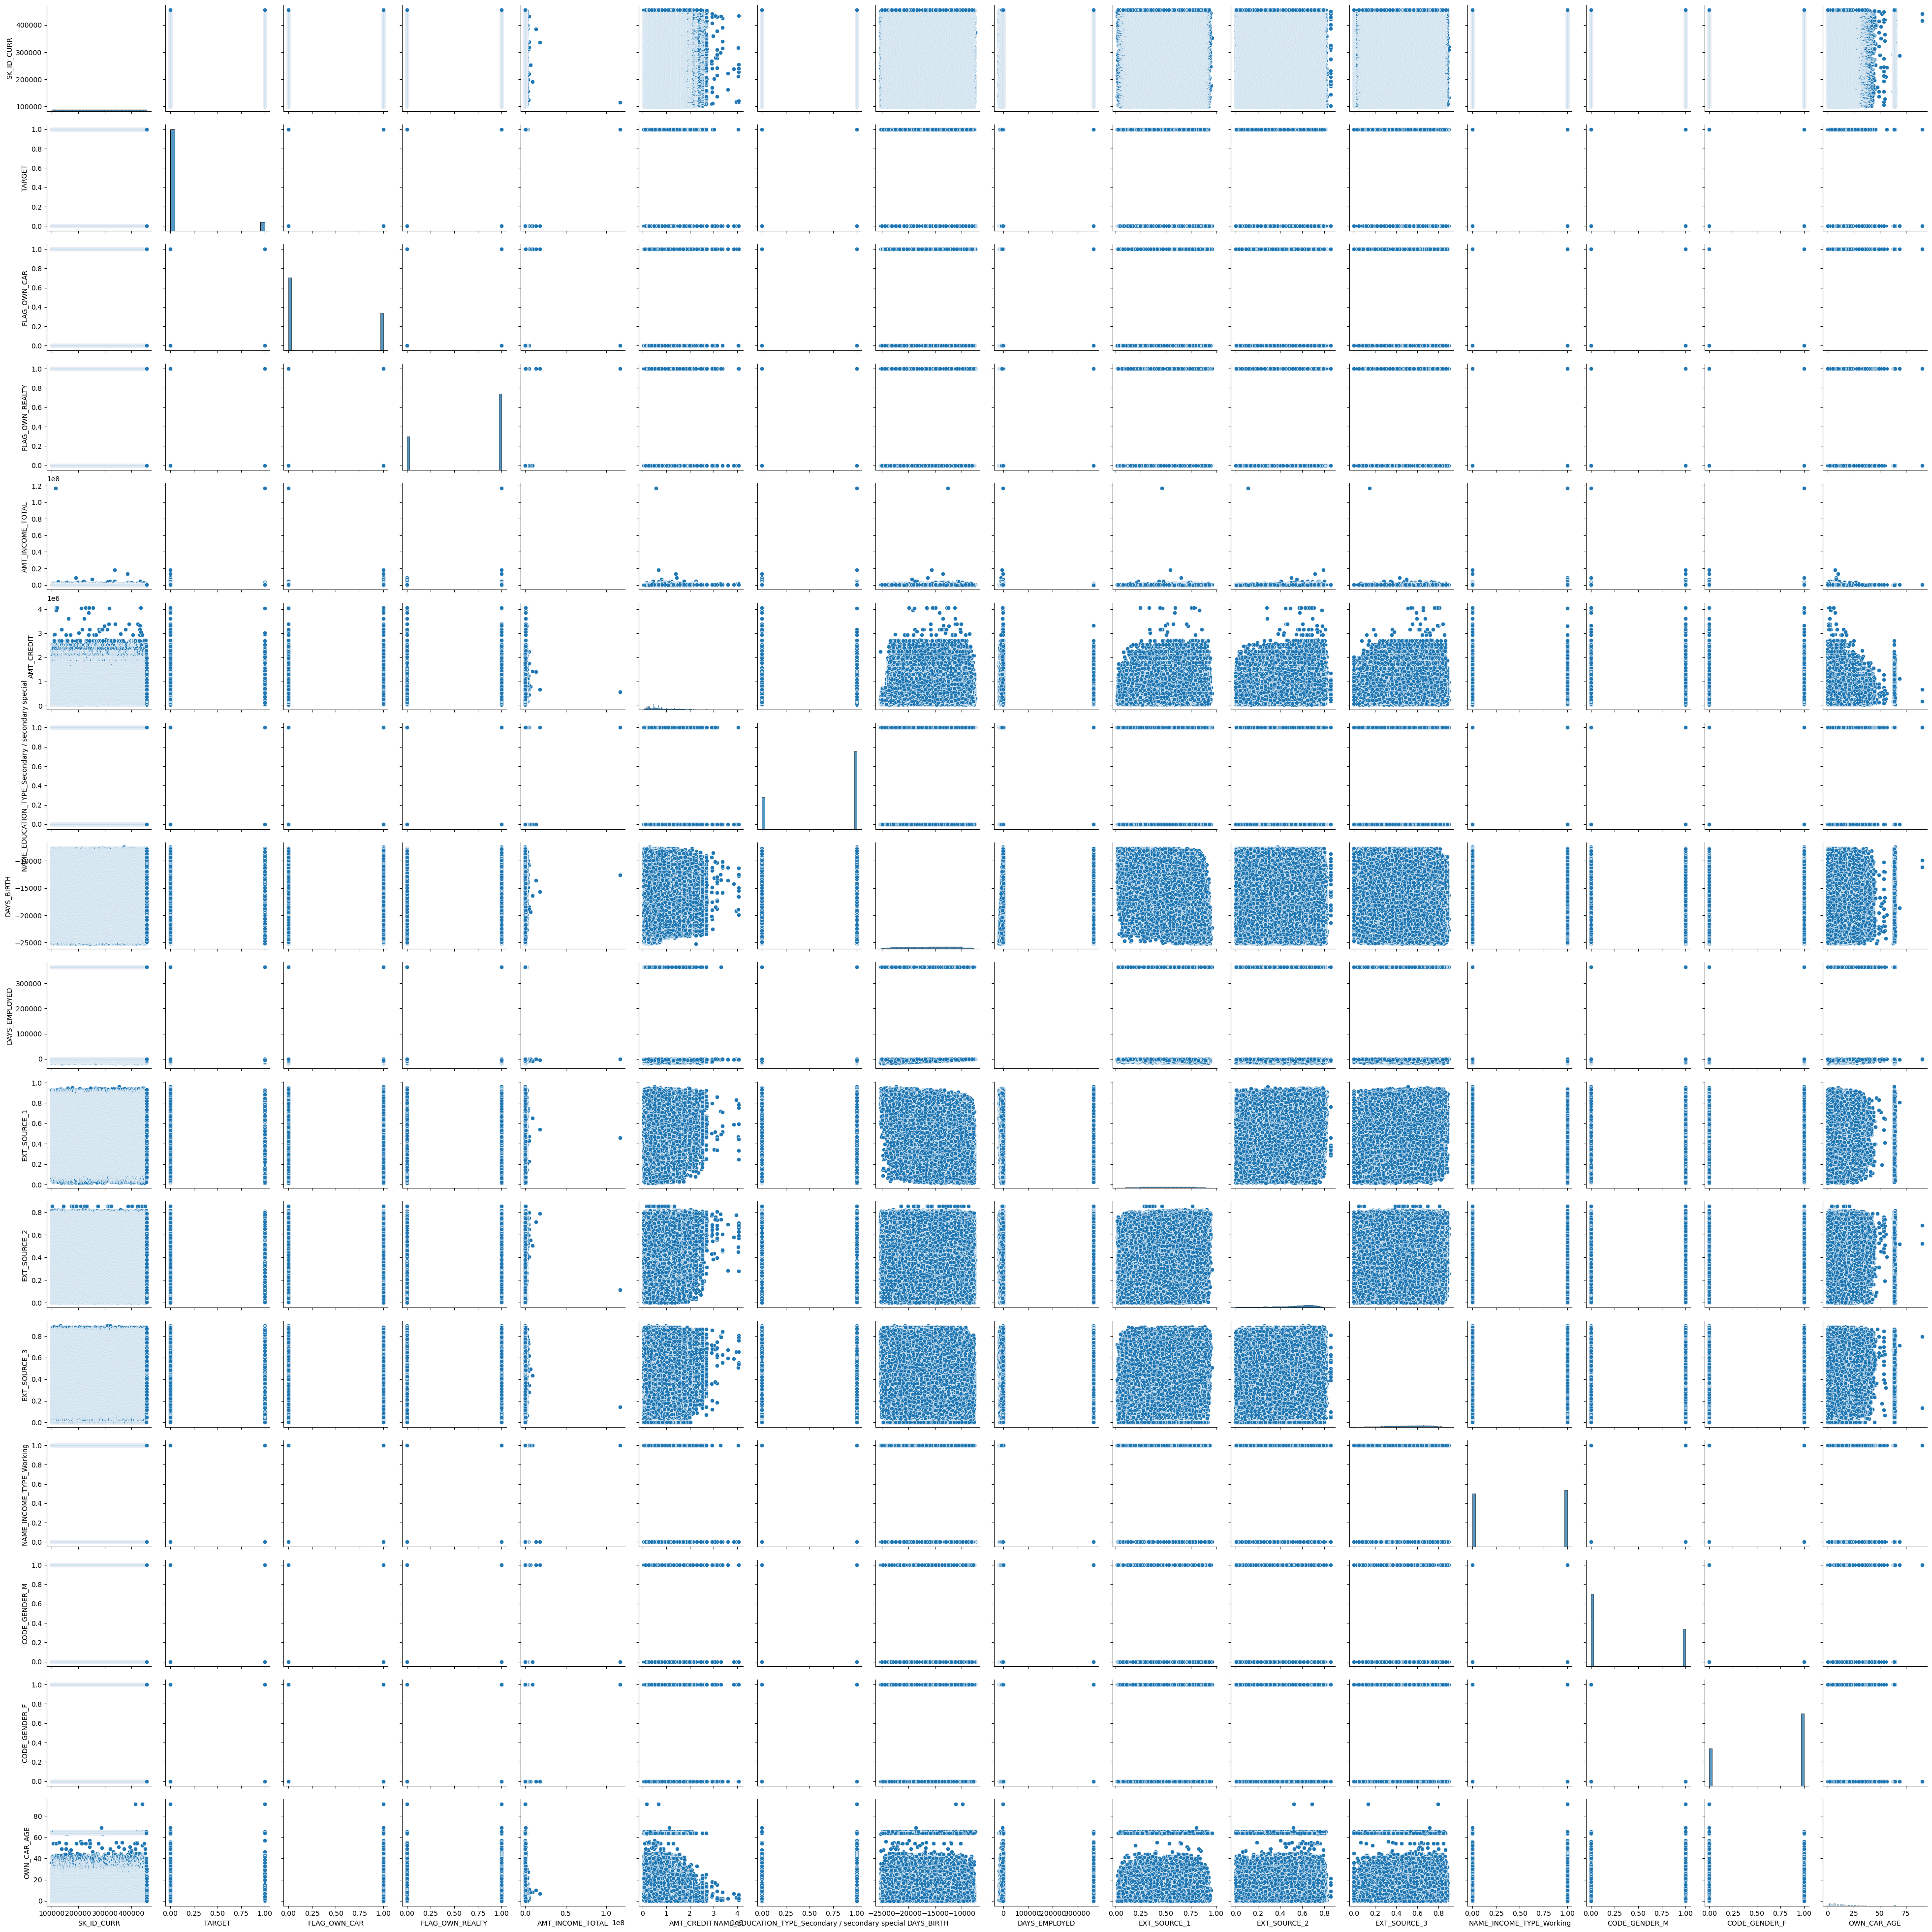

In [71]:
#@title Pair plot
sns.pairplot(loan) 